<a href="https://colab.research.google.com/github/LAGISHETTYNANDITHA/2203A52097/blob/main/bootstrapping_pca(8)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
data=pd.read_csv('/content/Wine.csv')
print(data)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [2]:
data.dropna(how='all')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
target=data['Customer_Segment']
feature=data.drop('Customer_Segment',axis=1)
print(target)
print(feature)

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74       

In [4]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=40)
print('Shape of x_train:', x_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (142, 13)
Shape of x_test: (36, 13)
Shape of y_train: (142,)
Shape of y_test: (36,)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
X = data.drop('Customer_Segment', axis=1)  # Assuming 'Outcome' is the target variable
y = data['Customer_Segment']

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the features
x_normalized = pd.DataFrame(scaler.fit_transform(feature), columns=feature.columns)


svm_classifier = SVC(kernel='linear', random_state=2)
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=20)
print(x_train.shape,x_test.shape)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy before pca: {accuracy:.2f}')
print(classification_report(y_test, y_pred))




(142, 13) (36, 13)
Accuracy before pca: 0.97
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.94      0.97        17
           3       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



      Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    0.842105    0.191700  0.572193      0.257732   0.619565       0.627586   
1    0.571053    0.205534  0.417112      0.030928   0.326087       0.575862   
2    0.560526    0.320158  0.700535      0.412371   0.336957       0.627586   
3    0.878947    0.239130  0.609626      0.319588   0.467391       0.989655   
4    0.581579    0.365613  0.807487      0.536082   0.521739       0.627586   
..        ...         ...       ...           ...        ...            ...   
173  0.705263    0.970356  0.582888      0.510309   0.271739       0.241379   
174  0.623684    0.626482  0.598930      0.639175   0.347826       0.282759   
175  0.589474    0.699605  0.481283      0.484536   0.543478       0.210345   
176  0.563158    0.365613  0.540107      0.484536   0.543478       0.231034   
177  0.815789    0.664032  0.737968      0.716495   0.282609       0.368966   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyan

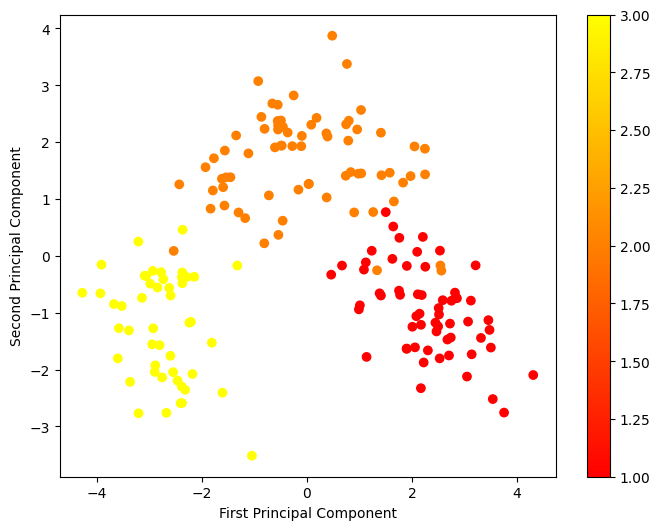

In [23]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the features
x_normalized = pd.DataFrame(scaler.fit_transform(feature), columns=feature.columns)
print(x_normalized)
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_normalized)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained Variance Ratio: {explained_variance_ratio}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='autumn')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm = SVC()
svm.fit(X_train, Y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy after pca:", accuracy)
print(classification_report(Y_test, y_pred))

Accuracy after pca: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



2ND QUESTION

In [39]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
data=pd.read_csv('/content/breast_cancer_survival (1).csv')
print(data)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [40]:
data['Patient_Status'] = data['Patient_Status'].map({'Alive': 1, 'Dead': 0})
data['HER2 status'] = data['HER2 status'].map({'Positive': 1, 'Negative': 0})
data = data.fillna(data.mean())
columns_to_drop = ['Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Histology', 'Tumour_Stage', 'Gender','ER status','PR status']
data = data.drop(columns=columns_to_drop)
print(data)

     Age  Protein1  Protein2  Protein3  Protein4  HER2 status  Patient_Status
0     42  0.952560   2.15000  0.007972 -0.048340            0             1.0
1     54  0.000000   1.38020 -0.498030 -0.507320            0             0.0
2     63 -0.523030   1.76400 -0.370190  0.010815            0             1.0
3     78 -0.876180   0.12943 -0.370380  0.132190            0             1.0
4     42  0.226110   1.74910 -0.543970 -0.390210            1             1.0
..   ...       ...       ...       ...       ...          ...             ...
329   59  0.024598   1.40050  0.024751  0.280320            1             1.0
330   41  0.100120  -0.46547  0.472370 -0.523870            1             1.0
331   54  0.753820   1.64250 -0.332850  0.857860            0             0.0
332   74  0.972510   1.42680 -0.366570 -0.107820            0             1.0
333   66  0.286380   1.39980  0.318830  0.836050            0             0.0

[334 rows x 7 columns]


<ipython-input-40-057f8ac67435>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [54]:
if data['Patient_Status'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")

target=data['Patient_Status'].astype(int)
feature=data.drop('Patient_Status',axis=1)
print(target)
print(feature)

0      1
1      0
2      1
3      1
4      1
      ..
329    1
330    1
331    0
332    1
333    0
Name: Patient_Status, Length: 334, dtype: int64
     Age  Protein1  Protein2  Protein3  Protein4  HER2 status
0     42  0.952560   2.15000  0.007972 -0.048340            0
1     54  0.000000   1.38020 -0.498030 -0.507320            0
2     63 -0.523030   1.76400 -0.370190  0.010815            0
3     78 -0.876180   0.12943 -0.370380  0.132190            0
4     42  0.226110   1.74910 -0.543970 -0.390210            1
..   ...       ...       ...       ...       ...          ...
329   59  0.024598   1.40050  0.024751  0.280320            1
330   41  0.100120  -0.46547  0.472370 -0.523870            1
331   54  0.753820   1.64250 -0.332850  0.857860            0
332   74  0.972510   1.42680 -0.366570 -0.107820            0
333   66  0.286380   1.39980  0.318830  0.836050            0

[334 rows x 6 columns]


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(feature)

In [56]:
print(target)

0      1
1      0
2      1
3      1
4      1
      ..
329    1
330    1
331    0
332    1
333    0
Name: Patient_Status, Length: 334, dtype: int64


In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.61%


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_classifier = SVC(kernel='linear', random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled,target, test_size=0.2, random_state=20)
print(X_train.shape,X_test.shape)
svm_classifier.fit(X_train, Y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:",accuracy)

(267, 6) (67, 6)
Accuracy: 0.8507462686567164


In [61]:
import numpy as np
num_bootstrap_samples = 100
uncertainties = []
for i in range(50):
    bootstrap_predictions = []
    for _ in range(num_bootstrap_samples):
        bootstrap_indices = np.random.choice(len(X_test), size=len(X_test), replace=True)
        bootstrap_X_test = X_test[bootstrap_indices]
        bootstrap_y_pred = svm_classifier.predict(bootstrap_X_test)
        bootstrap_predictions.append(bootstrap_y_pred[i])
    uncertainty_i = np.std(bootstrap_predictions)
    uncertainties.append(uncertainty_i)
print("Uncertainty for samples 1-50:")
print(uncertainties)

Uncertainty for samples 1-50:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
